# 实训1：Softmax实现手写数字识别

**相关知识点: numpy科学计算包，如向量化操作，广播机制等**

## 1 任务目标

### 1.1 简介

本次案例中，你需要用python实现Softmax回归方法，用于MNIST手写数字数据集分类任务。你需要完成前向计算loss和参数更新。

你需要首先实现Softmax函数和交叉熵损失函数的计算。
$$
y=softmax(W^Tx+b)\\
L=CrossEntropy(y,label)
$$
在更新参数的过程中，你需要实现参数梯度的计算，并按照随机梯度下降法来更新参数。
$$
\frac{\partial L}{\partial W},\frac{\partial L}{\partial b}
$$
具体计算方法可自行推导，或参照第三章课件。

 

### 1.2 MNIST数据集

​	MNIST手写数字数据集是机器学习领域中广泛使用的图像分类数据集。它包含60,000个训练样本和10,000个测试样本。这些数字已进行尺寸规格化，并在固定尺寸的图像中居中。每个样本都是一个784×1的矩阵，是从原始的28×28灰度图像转换而来的。MNIST中的数字范围是0到9。下面显示了一些示例。 注意：在训练期间，切勿以任何形式使用有关测试样本的信息。

![image.png](https://raw.githubusercontent.com/ZzDarker/figure/main/img/13f138b5-4ccb-435d-a956-d3ffa3e6a6c0.png)

### 1.3 任务要求

1. **代码清单**
   - a) `data/ 文件夹`：存放MNIST数据集。你需要下载数据，解压后存放于该文件夹下。下载链接见文末，解压后的数据为 `*ubyte` 形式；
   - b) `solver.py` 这个文件中实现了训练和测试的流程。建议从这个文件开始阅读代码；
   - c) `dataloader.py` 实现了数据加载器，可用于准备数据以进行训练和测试；
   - d) `visualize.py` 实现了`plot_loss_and_acc`函数，该函数可用于绘制损失和准确率曲线；
   - e) `optimizer.py` 你需要实现带`momentum`的SGD优化器，可用于执行参数更新；
   - f) `loss.py` 你需要实现`softmax_cross_entropy_loss`，包含loss的计算和梯度计算；
   - g) `runner.ipynb` 完成所有代码后的执行文件，执行训练和测试过程。

2. **要求**

   我们提供了完整的代码框架，你只需要完成**optimizer.py，loss.py** 中的 **#TODO**部分。你需要提交整个代码文件和带有结果的**runner.ipynb (不要提交数据集)** 并且附一个**pdf**格式报告，内容包括：

   - a) 记录训练和测试的准确率。画出训练损失和准确率曲线；

   - b) 比较使用和不使用momentum结果的不同，可以从训练时间，收敛性和准确率等方面讨论差异；

   - c) 调整其他超参数，如学习率，Batchsize等，观察这些超参数如何影响分类性能。写下观察结果并将这些新结果记录在报告中。

 

### 1.4 注意事项

1. 注意代码的执行效率，尽量不要使用for循环；
2. 不要在**pdf**报告中粘贴很多代码(只能包含关键代码)，对添加的代码作出解释;
3. 不要使用任何深度学习框架，如TensorFlow，Pytorch等；
4. 禁止抄袭。

 

### 1.5 参考

1. 数据集下载：[http://yann.lecun.com/exdb/mnist/index.html](http://yann.lecun.com/exdb/mnist/)

## 2 代码设计

In [1]:
from solver import Solver
from visualize import plot_loss_and_acc

In [2]:
# train without momentum
cfg = {
    'data_root': 'data',
    'max_epoch': 10,
    'batch_size': 100,
    'learning_rate': 0.01,
    'momentum': 0,
    'display_freq': 50,
}

runner = Solver(cfg)
loss1, acc1 = runner.train()

Epoch [0][10]	 Batch [0][550]	 Training Loss 2.3877	 Accuracy 0.1600
Epoch [0][10]	 Batch [50][550]	 Training Loss 1.9726	 Accuracy 0.3100
Epoch [0][10]	 Batch [100][550]	 Training Loss 1.6487	 Accuracy 0.5600
Epoch [0][10]	 Batch [150][550]	 Training Loss 1.3938	 Accuracy 0.6900
Epoch [0][10]	 Batch [200][550]	 Training Loss 1.2237	 Accuracy 0.7800
Epoch [0][10]	 Batch [250][550]	 Training Loss 1.0263	 Accuracy 0.8400
Epoch [0][10]	 Batch [300][550]	 Training Loss 1.0125	 Accuracy 0.7800
Epoch [0][10]	 Batch [350][550]	 Training Loss 0.9441	 Accuracy 0.7800
Epoch [0][10]	 Batch [400][550]	 Training Loss 0.9698	 Accuracy 0.7500
Epoch [0][10]	 Batch [450][550]	 Training Loss 0.8422	 Accuracy 0.7600
Epoch [0][10]	 Batch [500][550]	 Training Loss 0.9253	 Accuracy 0.7900

Epoch [0]	 Average training loss 1.2369	 Average training accuracy 0.6750
Epoch [0]	 Average validation loss 0.7046	 Average validation accuracy 0.8648

Epoch [1][10]	 Batch [0][550]	 Training Loss 0.7946	 Accuracy 0.8300

In [3]:
test_loss, test_acc = runner.test()
print('Final test accuracy {:.4f}\n'.format(test_acc))

Final test accuracy 0.9013



In [4]:
# train with momentum
cfg = {
    'data_root': 'data',
    'max_epoch': 10,
    'batch_size': 100,
    'learning_rate': 0.01,
    'momentum': 0.9,
    'display_freq': 50,
}

runner = Solver(cfg)
loss2, acc2 = runner.train()

Epoch [0][10]	 Batch [0][550]	 Training Loss 2.3870	 Accuracy 0.0800
Epoch [0][10]	 Batch [50][550]	 Training Loss 0.8613	 Accuracy 0.8100
Epoch [0][10]	 Batch [100][550]	 Training Loss 0.5793	 Accuracy 0.8700
Epoch [0][10]	 Batch [150][550]	 Training Loss 0.4246	 Accuracy 0.9300
Epoch [0][10]	 Batch [200][550]	 Training Loss 0.6486	 Accuracy 0.8500
Epoch [0][10]	 Batch [250][550]	 Training Loss 0.5252	 Accuracy 0.8200
Epoch [0][10]	 Batch [300][550]	 Training Loss 0.5618	 Accuracy 0.8500
Epoch [0][10]	 Batch [350][550]	 Training Loss 0.5347	 Accuracy 0.8700
Epoch [0][10]	 Batch [400][550]	 Training Loss 0.3791	 Accuracy 0.8800
Epoch [0][10]	 Batch [450][550]	 Training Loss 0.3255	 Accuracy 0.8900
Epoch [0][10]	 Batch [500][550]	 Training Loss 0.4358	 Accuracy 0.8700

Epoch [0]	 Average training loss 0.5758	 Average training accuracy 0.8437
Epoch [0]	 Average validation loss 0.3157	 Average validation accuracy 0.9182

Epoch [1][10]	 Batch [0][550]	 Training Loss 0.4039	 Accuracy 0.9100

In [5]:
test_loss, test_acc = runner.test()
print('Final test accuracy {:.4f}\n'.format(test_acc))

Final test accuracy 0.9214



In [6]:
# train with momentum
cfg = {
    'data_root': 'data',
    'max_epoch': 10,
    'batch_size': 10,
    'learning_rate': 0.01,
    'momentum': 0.9,
    'display_freq': 50,
}

runner = Solver(cfg)
loss3, acc3 = runner.train()

Epoch [0][10]	 Batch [0][5500]	 Training Loss 2.3536	 Accuracy 0.3000
Epoch [0][10]	 Batch [50][5500]	 Training Loss 1.3324	 Accuracy 0.7000
Epoch [0][10]	 Batch [100][5500]	 Training Loss 0.8937	 Accuracy 0.7000
Epoch [0][10]	 Batch [150][5500]	 Training Loss 0.3439	 Accuracy 0.9000
Epoch [0][10]	 Batch [200][5500]	 Training Loss 0.2386	 Accuracy 1.0000
Epoch [0][10]	 Batch [250][5500]	 Training Loss 0.1678	 Accuracy 0.9000
Epoch [0][10]	 Batch [300][5500]	 Training Loss 0.1959	 Accuracy 1.0000
Epoch [0][10]	 Batch [350][5500]	 Training Loss 0.6192	 Accuracy 0.9000
Epoch [0][10]	 Batch [400][5500]	 Training Loss 0.1501	 Accuracy 0.9000
Epoch [0][10]	 Batch [450][5500]	 Training Loss 0.4262	 Accuracy 0.8000
Epoch [0][10]	 Batch [500][5500]	 Training Loss 0.5018	 Accuracy 0.8000
Epoch [0][10]	 Batch [550][5500]	 Training Loss 0.3011	 Accuracy 1.0000
Epoch [0][10]	 Batch [600][5500]	 Training Loss 0.2039	 Accuracy 1.0000
Epoch [0][10]	 Batch [650][5500]	 Training Loss 0.7524	 Accuracy 0.

In [7]:
test_loss, test_acc = runner.test()
print('Final test accuracy {:.4f}\n'.format(test_acc))

Final test accuracy 0.9220



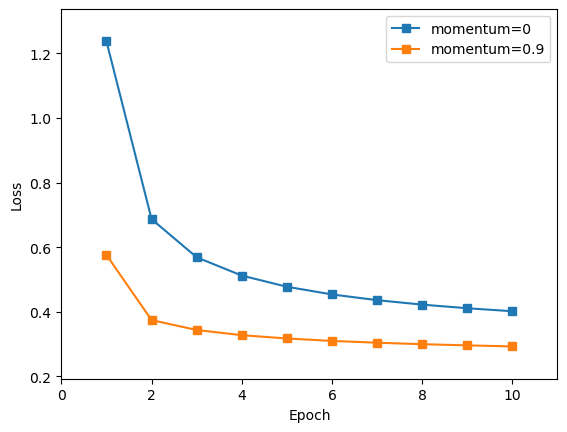

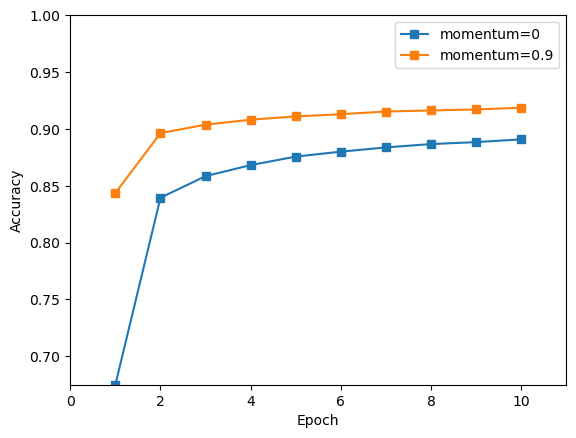

In [8]:
plot_loss_and_acc({
    "momentum=0": [loss1, acc1],
    "momentum=0.9": [loss2, acc2]
})

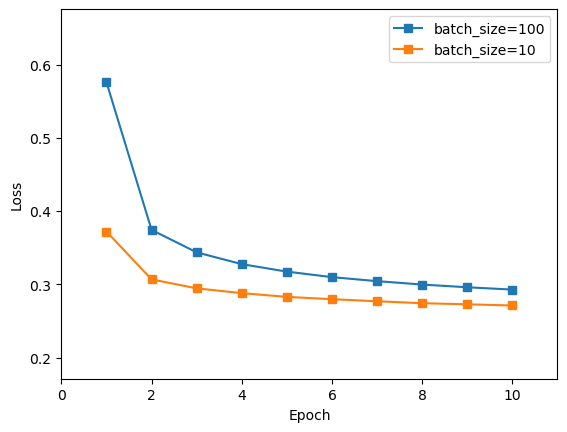

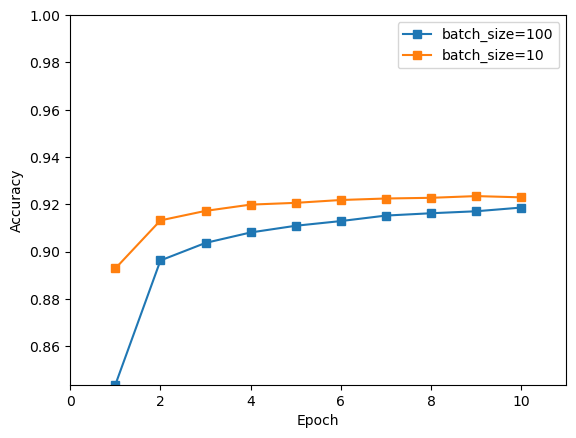

In [9]:
plot_loss_and_acc({
    "batch_size=100": [loss2, acc2],
    "batch_size=10": [loss3, acc3]
})

In [10]:
# train with momentum
cfg = {
    'data_root': 'data',
    'max_epoch': 10,
    'batch_size': 100,
    'learning_rate': 0.05,
    'momentum': 0.9,
    'display_freq': 50,
}

runner = Solver(cfg)
loss4, acc4 = runner.train()

Epoch [0][10]	 Batch [0][550]	 Training Loss 2.3061	 Accuracy 0.1700
Epoch [0][10]	 Batch [50][550]	 Training Loss 0.4517	 Accuracy 0.8700
Epoch [0][10]	 Batch [100][550]	 Training Loss 0.5306	 Accuracy 0.8300
Epoch [0][10]	 Batch [150][550]	 Training Loss 0.4041	 Accuracy 0.9100
Epoch [0][10]	 Batch [200][550]	 Training Loss 0.2998	 Accuracy 0.9100
Epoch [0][10]	 Batch [250][550]	 Training Loss 0.3953	 Accuracy 0.9000
Epoch [0][10]	 Batch [300][550]	 Training Loss 0.5756	 Accuracy 0.8400
Epoch [0][10]	 Batch [350][550]	 Training Loss 0.4435	 Accuracy 0.8300
Epoch [0][10]	 Batch [400][550]	 Training Loss 0.2244	 Accuracy 0.9600
Epoch [0][10]	 Batch [450][550]	 Training Loss 0.3187	 Accuracy 0.9100
Epoch [0][10]	 Batch [500][550]	 Training Loss 0.3376	 Accuracy 0.9100

Epoch [0]	 Average training loss 0.4086	 Average training accuracy 0.8822
Epoch [0]	 Average validation loss 0.2482	 Average validation accuracy 0.9294

Epoch [1][10]	 Batch [0][550]	 Training Loss 0.2472	 Accuracy 0.9100

In [11]:
test_loss, test_acc = runner.test()
print('Final test accuracy {:.4f}\n'.format(test_acc))

Final test accuracy 0.9201



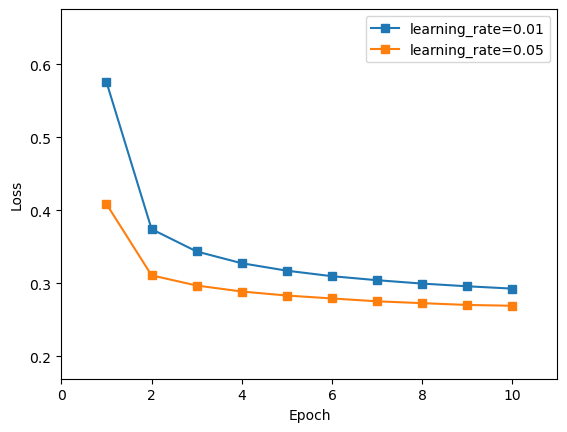

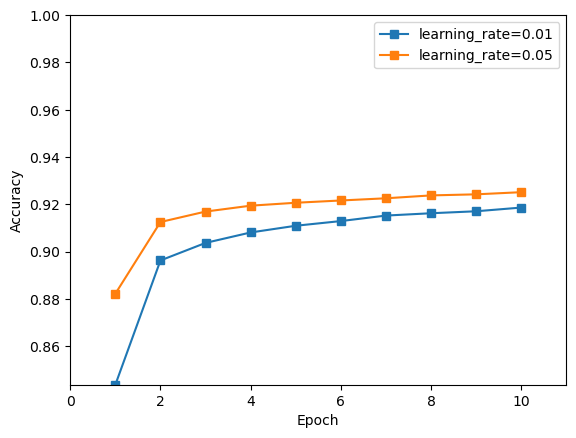

In [12]:
plot_loss_and_acc({
    "learning_rate=0.01": [loss2, acc2],
    "learning_rate=0.05": [loss4, acc4]
})

Epoch [0][10]	 Batch [0][1100]	 Training Loss 2.4040	 Accuracy 0.1400
Epoch [0][10]	 Batch [50][1100]	 Training Loss 2.0900	 Accuracy 0.2600
Epoch [0][10]	 Batch [100][1100]	 Training Loss 1.5595	 Accuracy 0.6400
Epoch [0][10]	 Batch [150][1100]	 Training Loss 1.4377	 Accuracy 0.6800
Epoch [0][10]	 Batch [200][1100]	 Training Loss 1.2509	 Accuracy 0.7400
Epoch [0][10]	 Batch [250][1100]	 Training Loss 1.0409	 Accuracy 0.8400
Epoch [0][10]	 Batch [300][1100]	 Training Loss 1.1718	 Accuracy 0.7000
Epoch [0][10]	 Batch [350][1100]	 Training Loss 1.0926	 Accuracy 0.7400
Epoch [0][10]	 Batch [400][1100]	 Training Loss 0.8549	 Accuracy 0.8800
Epoch [0][10]	 Batch [450][1100]	 Training Loss 0.7848	 Accuracy 0.8800
Epoch [0][10]	 Batch [500][1100]	 Training Loss 0.8509	 Accuracy 0.8200
Epoch [0][10]	 Batch [550][1100]	 Training Loss 0.9414	 Accuracy 0.7600
Epoch [0][10]	 Batch [600][1100]	 Training Loss 0.8744	 Accuracy 0.7600
Epoch [0][10]	 Batch [650][1100]	 Training Loss 0.7996	 Accuracy 0.

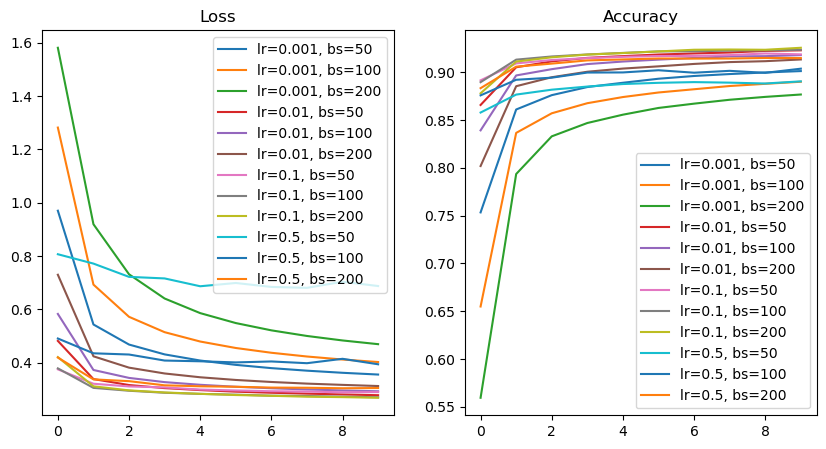

In [17]:
# train with momentum
import numpy as np
import matplotlib.pyplot as plt

cfg = {
    'data_root': 'data',
    'max_epoch': 10,
    'display_freq': 50,
    'momentum': 0.9,
}

# define the range of learning rate and batch size
lr_range = [0.001, 0.01, 0.1, 0.5]
bs_range = [50, 100, 200]

# store the loss and accuracy for each combination
loss_list = []
acc_list = []

# loop over the combinations
for i in range(4):
    for j in range(3):
        # set the learning rate and batch size
        cfg['learning_rate'] = lr_range[i]
        cfg['batch_size'] = bs_range[j]

        runner=Solver(cfg)
        # train the model and get the loss and accuracy
        loss, acc = runner.train()

        # append the loss and accuracy to the list
        loss_list.append(loss)
        acc_list.append(acc)

# plot the loss and accuracy curves
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(4):
    for j in range(3):
        # plot the loss curve on the first subplot
        ax[0].plot(loss_list[i*3+j], label=f'lr={lr_range[i]}, bs={bs_range[j]}')

        # plot the accuracy curve on the second subplot
        ax[1].plot(acc_list[i*3+j], label=f'lr={lr_range[i]}, bs={bs_range[j]}')

# set the title for the first subplot
ax[0].set_title('Loss')

# set the title for the second subplot
ax[1].set_title('Accuracy')

# set the legend for both subplots
ax[0].legend()
ax[1].legend()

# show the figure
plt.show()